<a href="https://colab.research.google.com/github/mustafabozkaya/PythonDataScienceHandbooks/blob/main/image_handle/kaggle_pil_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture 
# suppress output of the cell ,it is useful for long running cells
%%capture - -no-stderr
# suppress output of the cell ,it is useful for long running cells
%%capture - -no-display
# suppress output of the cell ,it is useful for long running cells
%%capture - -no-stderr - -no-display


In [2]:
# create env for workspace with virtualenv
%pip install virtualenv
!virtualenv -p python3 env
!source env/bin/activate
# %pip install -r requirements.txt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 4.2 MB/s 
     |████████████████████████████████| 468 kB 35.1 MB/s 
created virtual environment CPython3.7.14.final.0-64 in 1987ms
  creator CPython3Posix(dest=/content/env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==22.2.2, setuptools==65.3.0, wheel==0.37.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore', category=FutureWarning)  # ignore FutureWarning
#ignore future release warnings from all libraries
filterwarnings('ignore', category=DeprecationWarning) #ignore deprecation warnings from all libraries

In [ ]:
%pip install -q Pillow # Pillow is a Python Imaging Library (PIL) fork   
%pip install -q matplotlib # Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
%pip install -q pandas # pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
%pip install -q seaborn # Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
%pip install -q scikit-learn # Scikit-learn is a free software machine learning library for the Python programming language.
%pip install -q tensorflow # TensorFlow is an end-to-end open source platform for machine learning.
%pip install -q keras # Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.
%pip install -q opencv-python # OpenCV-Python is a library of Python bindings designed to solve computer vision problems.
%pip install -q tqdm # Tqdm is a fast, extensible progress bar for Python and CLI


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you 

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import PIL as pl 
import cv2 
import os
import random
import warnings
from tqdm import tqdm
import sklearn.datasets as datasets

2022-10-16 23:55:49.570147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mustafa/teknofest_ws/devel/lib:/home/mustafa/catkin_ws/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu
2022-10-16 23:55:49.570262: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
# Importing img datasets from sklearn
from matplotlib.pyplot import flag
from sklearn.datasets import load_sample_image # Load sample images for image manipulation
from sklearn.datasets import load_sample_images # 2 images of 427 x 640 pixels
from sklearn.datasets import load_digits # 1797 images of 8x8 pixels


digits = load_digits() # load digits dataset (1797 images of 8x8 pixels)
images = load_sample_images() # load sample images dataset (2 images of 427 x 640 pixels)
china = load_sample_image("china.jpg") # load china image dataset (427 x 640 pixels)
flower = load_sample_image("flower.jpg") # load flower image dataset (427 x 640 pixels)




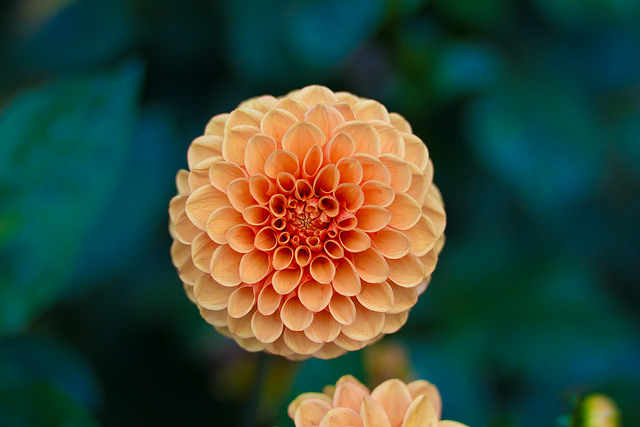

In [ ]:
# display the images with Pillow
pl.Image.fromarray(flower) # display china image

In [ ]:
digits.data[1000].shape

(64,)

In [ ]:
digits.data[100].reshape(8,8).astype(np.uint8)

array([[ 0,  0,  0,  2, 13,  0,  0,  0],
       [ 0,  0,  0,  8, 15,  0,  0,  0],
       [ 0,  0,  5, 16,  5,  2,  0,  0],
       [ 0,  0, 15, 12,  1, 16,  4,  0],
       [ 0,  4, 16,  2,  9, 16,  8,  0],
       [ 0,  0, 10, 14, 16, 16,  4,  0],
       [ 0,  0,  0,  0, 13,  8,  0,  0],
       [ 0,  0,  0,  0, 13,  6,  0,  0]], dtype=uint8)

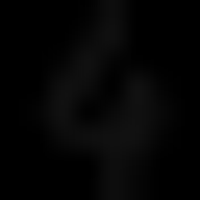

In [ ]:
pil_img=pl.Image.fromarray(digits.data[100].reshape(8,8).astype(np.uint8)).resize((200,200)).convert('RGB')
pil_img

In [ ]:
type(pil_img)

PIL.Image.Image

In [ ]:
# kaggle xray dataset download
%pip install -q kaggle



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pwd

/home/mustafa/Desktop/kaggle_pillow_xray


In [ ]:
!ls -la

total 524
drwxrwxr-x 3 mustafa mustafa   4096 Eki 16 23:53 .
drwxr-xr-x 7 mustafa mustafa   4096 Eki 16 22:25 ..
drwxrwxr-x 4 mustafa mustafa   4096 Eki 16 23:53 env
-rw-rw-r-- 1 mustafa mustafa 516485 Eki 16 23:56 kaggle_pil_xray.ipynb
-rw-rw-r-- 1 mustafa mustafa    648 Mar  9  2020 OvaryCancer.csv


In [ ]:
# !mkdir - p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# kaggle datasets filter 
!kaggle datasets list -h 

usage: kaggle datasets list [-h] [--sort-by SORT_BY] [--size SIZE]
                            [--file-type FILE_TYPE] [--license LICENSE_NAME]
                            [--tags TAG_IDS] [-s SEARCH] [-m] [--user USER]
                            [-p PAGE] [-v] [--max-size MAX_SIZE]
                            [--min-size MIN_SIZE]

optional arguments:
  -h, --help            show this help message and exit
  --sort-by SORT_BY     Sort list results. Default is 'hottest'. Valid options are 'hottest', 'votes', 'updated', and 'active'
  --size SIZE           DEPRECATED. Please use --max-size and --min-size to filter dataset sizes.
  --file-type FILE_TYPE
                        Search for datasets with a specific file type. Default is 'all'. Valid options are 'all', 'csv', 'sqlite', 'json', and 'bigQuery'. Please note that bigQuery datasets cannot be downloaded
  --license LICENSE_NAME
                        Search for datasets with a specific license. Default is 'all'. Valid options ar

In [ ]:
# list kaggle datasets name ,size, last update date and download link
!kaggle datasets list


ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25           2996         94  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11           2553         74  1.0              
thedevastator/a-complete-history-of-nobel-prize-winners         Nobel Prize Winners                                   1MB  2022-10-08 00:09:57            598         22  1.0              
thedevastator/fast-food-restaurants-in-the-united-states    

In [ ]:
!kaggle datasets list -s "brain-tumor-classification-mri" --tag mri -p 1 -v --sort-by hottest  --min-size 10 --file-type all --license all

ref,title,size,lastUpdated,downloadCount,voteCount,usabilityRating
sartajbhuvaji/brain-tumor-classification-mri,Brain Tumor Classification (MRI),87MB,2020-05-24 16:24:55,18114,341,0.875
ahmedhamada0/brain-tumor-detection,Br35H :: Brain Tumor Detection 2020,84MB,2021-11-14 04:39:25,6810,163,0.875
jarvisgroot/brain-tumor-classification-mri-images,Brain Tumor Classification MRI Images,633MB,2021-07-04 21:21:38,593,28,0.9375
masoudnickparvar/brain-tumor-mri-dataset,Brain Tumor MRI Dataset,149MB,2021-09-24 12:43:45,4885,113,0.875
dschettler8845/brats-2021-task1,BRaTS 2021 Task 1 Dataset,12GB,2021-08-19 21:59:00,5346,106,0.875
andrewmvd/brain-tumor-segmentation-in-mri-brats-2015,Brain Tumor Segmentation,8GB,2021-07-12 04:40:50,5820,132,0.8235294
navoneel/brain-mri-images-for-brain-tumor-detection,Brain MRI Images for Brain Tumor Detection,15MB,2019-04-14 15:15:54,42920,845,0.5
mpwolke/cusersmarildownloadstumorcsv,Glioblastoma and Solitary Metastasis,493B,2021-07-16 13:28:07,35,14,1.0
ashkhag

In [ ]:
# download kaggle dataset
tqdm.pandas() # progress_apply

!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste


100%|████████████████████████████████████████| 266M/266M [01:37<00:00, 3.02MB/s]
100%|████████████████████████████████████████| 266M/266M [01:37<00:00, 2.86MB/s]


In [ ]:
!ls -la

total 952
drwxrwxr-x 3 mustafa mustafa   4096 Eki 17 00:38 .
drwxr-xr-x 7 mustafa mustafa   4096 Eki 16 22:25 ..
-rw-rw-r-- 1 mustafa mustafa    974 Eyl 24  2020 130-0.jpg
-rw-rw-r-- 1 mustafa mustafa 308294 Oca  8  2020 citrus.csv
drwxrwxr-x 4 mustafa mustafa   4096 Eki 16 23:53 env
-rw-rw-r-- 1 mustafa mustafa  56650 Eki 17 00:38 face-detection-in-images.zip
-rw-rw-r-- 1 mustafa mustafa    963 Eki 17 00:24 image-to-test.zip
-rw-rw-r-- 1 mustafa mustafa 519677 Eki 17 00:38 kaggle_pil_xray.ipynb
-rw-rw-r-- 1 mustafa mustafa  62683 Eki 17 00:30 oranges-vs-grapefruit.zip


In [ ]:
!pwd

/home/mustafa/Desktop/kaggle_pillow_xray


In [ ]:
tqdm.pandas() # progress_apply

!unzip -q sea-animals-image-dataste.zip

In [ ]:
!rm -rf sea-animals-image-dataste.zip

In [ ]:
%ls -la

total 832
drwxrwxr-x  3 mustafa mustafa   4096 Eki 17 00:55 ./
drwxr-xr-x  7 mustafa mustafa   4096 Eki 16 22:25 ../
-rw-rw-r--  1 mustafa mustafa    974 Eyl 24  2020 130-0.jpg
-rw-rw-r--  1 mustafa mustafa 308294 Oca  8  2020 citrus.csv
-rw-rw-r--  1 mustafa mustafa 521906 Eki 17 00:55 kaggle_pil_xray.ipynb
drwxrwxr-x 22 mustafa mustafa   4096 Eki 17 00:55 sea_animals/


In [ ]:
PATH = os.getcwd()
print(PATH)

/home/mustafa/Desktop/kaggle_pillow_xray


In [ ]:
image_path = PATH + '/sea_animals'

In [ ]:
img_classes = os.listdir(image_path)
print(img_classes)

['Nudibranchs', 'Whale', 'Jelly Fish', 'Crabs', 'Squid', 'Starfish', 'Sea Urchins', 'Puffers', 'Sharks', 'Seahorse', 'Dolphin', 'Eel', 'Corals', 'Octopus', 'Turtle_Tortoise', 'Penguin', 'Seal', 'Lobster', 'Sea Rays']


Nudibranchs


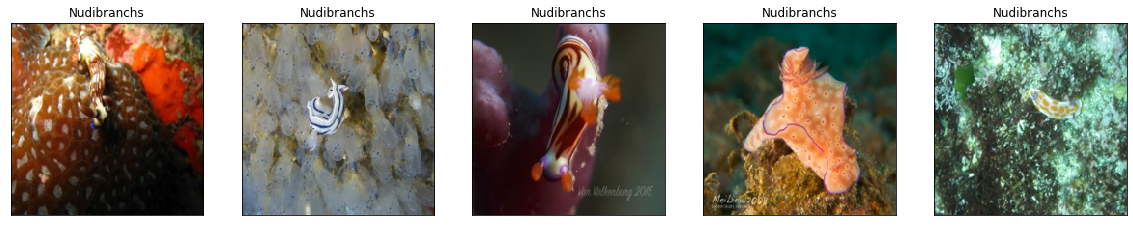

Whale


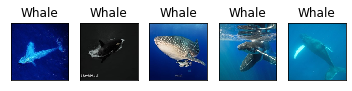

Jelly Fish


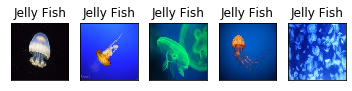

Crabs


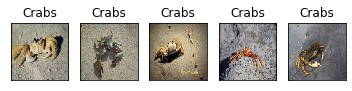

Squid


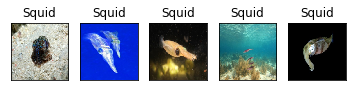

Starfish


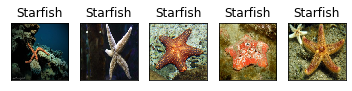

Sea Urchins


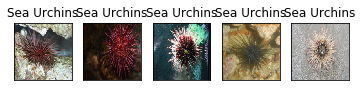

Puffers


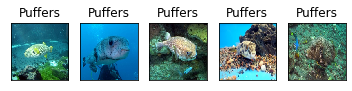

Sharks


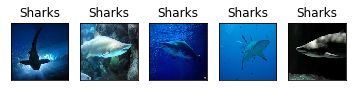

Seahorse


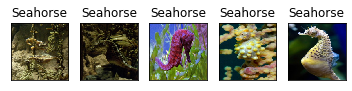

Dolphin


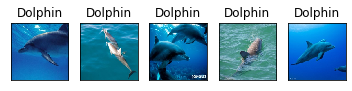

Eel


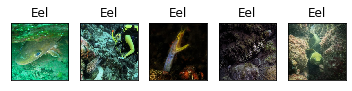

Corals


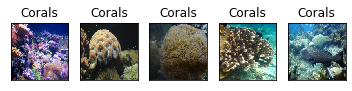

Octopus


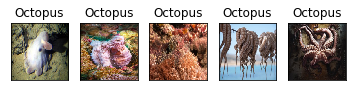

Turtle_Tortoise


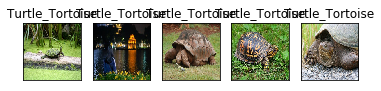

Penguin


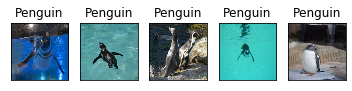

Seal


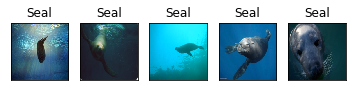

Lobster


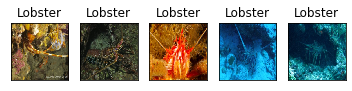

Sea Rays


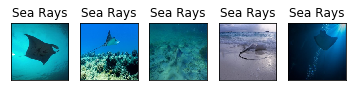

In [ ]:
# display specific class images with Pillow
plt.figure(figsize=(20,20))
    
for img_class in img_classes:
    print(img_class)
    img_path = image_path + '/' + img_class # path of the class
    images = os.listdir(img_path) # list of files in the class
    for i in range(5):
        if images[i].endswith('.jpg') or images[i].endswith('.png'): # check if the file is an image
            pil_img=pl.Image.open(img_path + '/' + images[i]).resize((200,200)).convert('RGB') # open the image and resize it to 200x200 pixels and convert it to RGB format
            ax=plt.subplot(1, 5, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(pil_img) # display the image with matplotlib
            plt.title(img_class) # set the title of the image to the class name])

    plt.show()
       

In [ ]:
# remove background from images with rembg
%pip install -q rembg

In [ ]:
#

In [ ]:
%%HTML 
<marquee style='width: 90%; color: Yellow;'><b>Thank you for reading my notebook. If you like it, please upvote it.</b></marquee>


In [ ]:
%%! 
echo "Thank you for reading my notebook. If you like it, please upvote it."


['Thank you for reading my notebook. If you like it, please upvote it.']

In [ ]:
%%bash 
echo "Thank you for reading my notebook. If you like it, please upvote it."


Thank you for reading my notebook. If you like it, please upvote it.


In [ ]:
%%python3 
print("Thank you for reading my notebook. If you like it, please upvote it.")

Thank you for reading my notebook. If you like it, please upvote it.
